# 03. Pytorch Computer Vision

![Pytorch Computer Vision Workflow](../assets/03-pytorch-computer-vision-workflow.png)

## 0. Computer Vision Libraries in Pytorch

| **PyTorch module** | **What does it do?** |
| --- | --- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch. |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import  matplotlib.pyplot as plt

print(f"Pytorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

Pytorch version: 2.8.0
torchvision version: 0.23.0


## 1. Getting a Dataset

![Fashion MNIST Dataset](../assets/03-fashion-mnist-slide.png)

- `torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.

- PyTorch has a bunch of computer vision datasets stored in torchvision.datasets. Including FashionMNIST in `torchvision.datasets.FashionMNIST()`


To download it, we provide the following parameters:

- root: str - which folder do you want to download the data to?

- train: Bool - do you want the training or test split?

- download: Bool - should the data be downloaded?

- transform: torchvision.transforms - what transformations would you like to do on the data?

- target_transform - you can transform the targets (labels) if you like too.


In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,   # get training data
    download = True,    
    transform = ToTensor(),     # Images come as a PIL format, we want to turn into Torch tensors
    target_transform = None,
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

In [3]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 Input and Output shape of a Computer Vision model

- We've got a big tensor of values (the image) leading to a single value for the target (the label).


In [4]:
# What's the shape of the image ?
image.shape

torch.Size([1, 28, 28])

`[color_channels=1, height=28, width=28]`

- `color_channels = 1` means the image is greyscale.

![Input and Output Shapes](../assets/03-computer-vision-input-and-output-shapes.png)

- Various problems will have various input and output shapes. But the premise remains: encode data into numbers, build a model to find patterns in those numbers, convert those patterns into something meaningful.

- If color_channels=3, the image comes in pixel values for red, green and blue (this is also known as the RGB color model).

- The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

In [5]:
# let's check how many samples are there
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
# see classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### 1.2 Visualizing our Data



Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

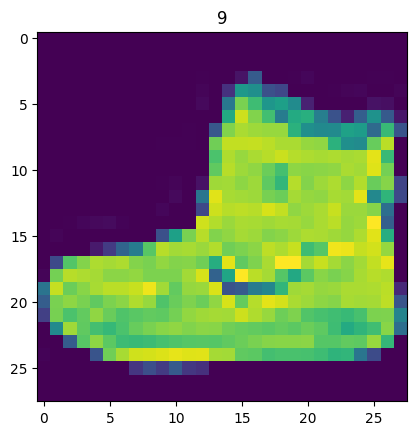

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())     # image shape is [1,28,28]  (color_channels, height, width)
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

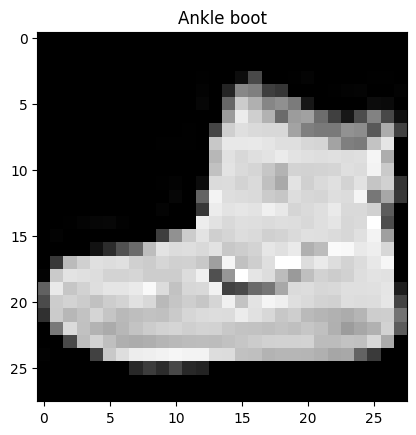

In [8]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

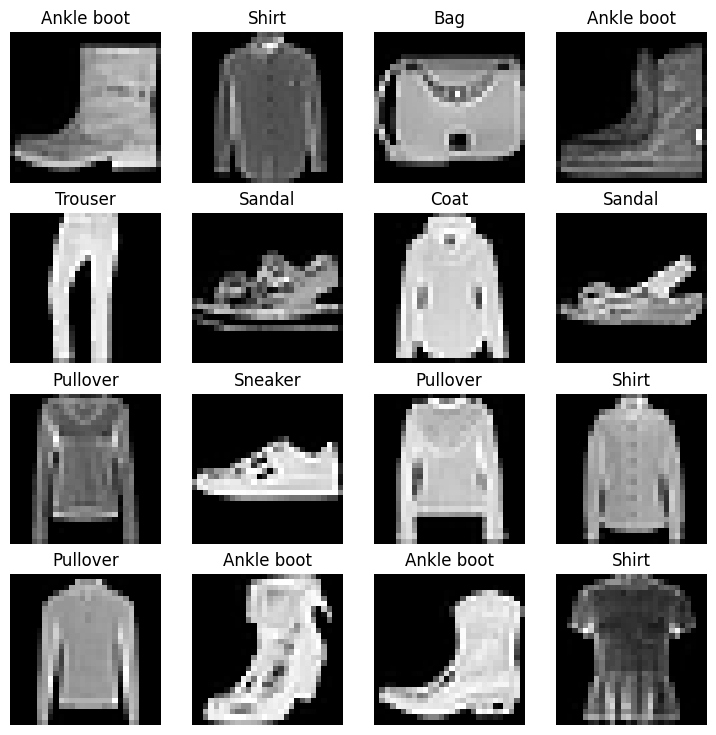

In [9]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare DataLoader

DataLoader - It helps load data into a model. For training and for inference. It turns a large Dataset into Python iterable of smaller chunks. These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter.

It's more computationally efficient.

- With mini-batches (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

- Good Batch Size: 32 is a good place to start. But since this is a value you can set (a hyperparameter) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

Let's create a DataLoader for our training and test sets.

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

# Let's check out what we've created
print(f"Dataloader: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x1544ce080>, <torch.utils.data.dataloader.DataLoader object at 0x1544cfa60>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
# Check out what's insise the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


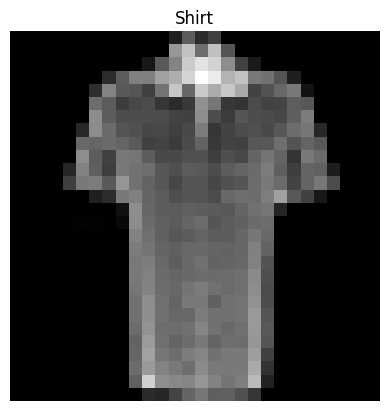

In [12]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis('Off')
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

Time to build a baseline model by subclassing nn.Module.

A baseline model is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

Because we're working with image data, we're going to use a different layer to start things off.

And that's the nn.Flatten() layer.

nn.Flatten() compresses the dimensions of a tensor into a single vector.



In [13]:
# Create a flatten layer
flatten_model = nn.Flatten()    # all nn modules functions as a model (can do a forward pass)
# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)   # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [c, h, w]")
print(f"Shape after flattening: {output.shape} -> [c, h*w]")


Shape before flattening: torch.Size([1, 28, 28]) -> [c, h, w]
Shape after flattening: torch.Size([1, 784]) -> [c, h*w]


The nn.Flatten() layer took our shape from [color_channels, height, width] to [color_channels, height*width].

Why do this?

Because we've now turned our pixel data from height and width dimensions into one long feature vector.

And nn.Linear() layers like their inputs to be in the form of feature vectors.

In [14]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_units),
            nn.Linear(in_features = hidden_units, out_features = output_shape)            
        )
    def forward(self, x):
        return self.layer_stack(x)
    

In [15]:
torch.manual_seed(42)

# Need to setup model with input paramters
model_0 = FashionMNISTModelV0(input_shape = 784, hidden_units = 10, output_shape = len(class_names))

model_0.to('cpu')

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Setup Loss, Optimizer and evaluation metrics



In [16]:
# defining the accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

In [17]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()     # this is also called criterion or cost function
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

### 3.2 Crearting a function to time our experiments

let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the timeit.default_timer() function from the Python timeit module.



In [18]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """ Prints difference between start and end time
    Args:
        start (float): start time of computation (preferred in timeit format)
        end (float) : End time of computation
        device ([type], optional) : Device that compute is running on. Defaults to None.
    
    Returns:
        float: time between start and end in seconds (higher is longer)
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


### 3.3 Creating a training loop and training a model on a batches of data

- we will add another loop to loop through our data batches

- Our databatches are contained within our Dataloader's train_dataloader, test_dataloader for the training and test data splits respectively.

- Since we are computing on batches of data, out loss functions and evaluation metrics will be calculated per batch rather than accross the whole dataset.

- this means, we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.

- Let's step through it : 
    1. Loop through epochs
    2. Loop through training batches. perform training steps, calculate the train loss per batch
    3. Loop through testing batches, perform testing steps, calculate the test loss per batch
    4. Print out what's happening
    5. time it all (for fun)

    

In [19]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3
# device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'

# creating training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------")
    ### training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)
        
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            
    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            # Forward pass
            test_pred = model_0(X)
            
            # Calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y)      # accumulatively add up the loss per epoch 
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)
        
        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
        
    # Print out what's happending
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
    

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start = train_time_start_on_cpu,
    end = train_time_end_on_cpu,
    device = str(next(model_0.parameters()).device)
)
            

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 5.732 seconds


## 4. Make predictions and get Model 0 results

- Namely, let's create a function that takes in a trained model, a DataLoader, a loss function and an accuracy function.

- The function will use the model to make predictions on the data in the DataLoader and then we can evaluate those predictions using the loss function and accuracy function.



In [20]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
    """ Returns a dictionary containing the results of model predicting on data_loader
    Args:
        - model (torch.nn.Module): A pytorch model capable of making predictions on data_lodaer
        - data_loader (torch.utils.data.DataLoader) : The target dataset to predict on
        - loss_fn (torch.nn.Module) : The loss function of model
        - accuracy_fn : An accuracy function to compare the models predictions to the truth labels
    Returns:
        (dict): Results of model making predictions on data_loader
    """
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            # make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
            
        # Scale loss and accuracy to find the average loss/acc per 
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {
        "model_name": model.__class__.__name__,
        'model_loss': loss.item(),
        'model_acc': acc,
    }
    
# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0, data_loader = test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 5. Setup device agnostic code


In [21]:
import torch

device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'

device

'mps'

## 6. Model-1: Building a better model with non-linearity



In [22]:
# create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)
    
    
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784, hidden_units = 10, output_shape = len(class_names)).to(device)

print(next(model_1.parameters()).device)
print(model_1)


mps:0
FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)


### 6.1 Setup Loss, Optimizer and evaluation metrics




In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.1)

### 6.2 Functionizing Training and Test Loops


In [24]:
def train_step(model: torch.nn.Module, 
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X,y = X.to(device), y.to(device)
        # 1. Forward Pass
        y_pred = model(X)
        
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true = y,
                                 y_pred = y_pred.argmax(dim=1))
        
        # Optimizer zero grad
        optimizer.zero_grad()
        
        # Loss backward
        loss.backward()
        
        # Optimizer step
        optimizer.step()
    
    # Calculate loss and accuracy per epoch and print out what's happenning
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}")
    


In [25]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module, 
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0,0
    model.to(device)
    model.eval()    # put model in eval mode
    # Turn on inference contect manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            # forward pass
            test_pred = model(X)
            
            # Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred = test_pred.argmax(dim=1))
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
            

In [26]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------------")
    train_step(data_loader = train_dataloader,
               model = model_1,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn)
    test_step(data_loader = test_dataloader,
              model = model_1,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn)
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------------
Train loss: 1.09199 | Train accuracy: 61.34
Test Loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
----------------
Train loss: 0.78097 | Train accuracy: 71.94
Test Loss: 0.72611 | Test accuracy: 73.99%

Epoch: 2
----------------
Train loss: 0.67040 | Train accuracy: 75.94
Test Loss: 0.69007 | Test accuracy: 74.81%

Train time on mps: 11.091 seconds


Our model trained but the training time took longer?

Note: The training time on CUDA vs CPU will depend largely on the quality of the CPU/GPU you're using. Read on for a more explained answer.

Question: "I used a GPU but my model didn't train faster, why might that be?"

Answer: Well, one reason could be because your dataset and model are both so small (like the dataset and model we're working with) the benefits of using a GPU are outweighed by the time it actually takes to transfer the data there.

There's a small bottleneck between copying data from the CPU memory (default) to the GPU memory.

So for smaller models and datasets, the CPU might actually be the optimal place to compute on.

But for larger datasets and models, the speed of computing the GPU can offer usually far outweighs the cost of getting the data there.

However, this is largely dependent on the hardware you're using. With practice, you will get used to where the best place to train your models is.



In [27]:
# uncomment this code to see the errors
# torch.manual_seed(42)

# # note: this will error due to `eval_model()` not using device agnostic code
# model_1_results = eval_model(model = model_1,
#                              data_loader = test_dataloader,
#                              loss_fn = loss_fn,
#                              accuracy_fn = accuracy_fn)
# model_1_results

In [28]:
# Move values to device
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset
    
    Args:
        - model (torch.nn.Module) : A Pytorch model capable of making predictions on data_loader
        - data_loader (torch.utils.data.DataLoader) : The target dataset to predict on
        - loss_fn (torch.nn.Module) : The loss function of model
        - accuracy_fn : An accuracy function to compare the models predictions to the truth labels
        - device (str, optional): Target device to compute on. Defaults to device
    
    Returns:
        - (dict) : Results of model making predictions on data_loader
    """
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {
        "model_name": model.__class__.__name__,
        'model_loss': loss.item(),
        'model_acc': acc
    }
    
# Calculate model 1 results with device agnostic code
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6900655031204224,
 'model_acc': 74.810303514377}

In [29]:
# check baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Woah, in this case, it looks like adding non-linearities to our model made it perform worse than the baseline.

That's a thing to note in machine learning, sometimes the thing you thought should work doesn't.

And then the thing you thought might not work does.

It's part science, part art.



From the looks of things, it seems like our model is overfitting on the training data.

Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

Two of the main ways to fix overfitting include:

- Using a smaller or different model (some models fit certain kinds of data better than others).

- Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).

There are more, but I'm going to leave that as a challenge for you to explore.

Try searching online, "ways to prevent overfitting in machine learning" and see what comes up.

In the meantime, let's take a look at number 1: using a different model.

## 7. Model 2: Building a Convolutional Neural Network (CNN)

[CNN Explainer Website](https://poloclub.github.io/cnn-explainer/)

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the CNN Explainer website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.



#### What model should I use

| **Problem type** | **Model to use (generally)** | **Code example** |
| --- | --- | --- |
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost library](https://xgboost.readthedocs.io/en/stable/) |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) |

Note: The table above is only for reference, the model you end up using will be highly dependent on the problem you're working on and the constraints you have (amount of data, latency requirements).



To do so, we'll leverage the nn.Conv2d() and nn.MaxPool2d() layers from torch.nn.



In [30]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """

    def __init__(self, input_shape:int, hidden_units:int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape, 
                      out_channels = hidden_units,
                      kernel_size = 3, # how big is the square that's going over the image ?
                      stride = 1,   # default
                      padding = 1), # options = 'valid' (no padding) or `same` (output has the same shape as input) or int for specified number
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 1,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 1)    # default stride value is same as the kernel size
        )        
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from ?
            # It's because each layer of our network compresses and changes the shape of our input data
            nn.Linear(in_features = hidden_units * 7 * 7,
                      out_features = output_shape)
        )
        
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
    
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1, hidden_units = 10, 
                              output_shape = len(class_names)
                              ).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

What we have done is a common practice in Machine Learning.

Find a model architecture somewhere and replicate it with code

### 7.1 Stepping through `nn.Conv2d()`

We could start using our model above and see what happens but let's first step through the two new layers we've added:

nn.Conv2d(), also known as a convolutional layer.
nn.MaxPool2d(), also known as a max pooling layer.

**Question: What does the "2d" in nn.Conv2d() stand for?**

- The 2d is for 2-dimensional data. As in, our images have two dimensions: height and width. Yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.

- For other dimensional data (such as 1D for text or 3D for 3D objects) there's also nn.Conv1d() and nn.Conv3d().



To test the layers out, let's create some toy data just like the data used on CNN Explainer.



In [31]:
torch.manual_seed(42)

# Create a sample batch of random numbers with same size as image batch
images = torch.randn(size=(32,3,64,64))     # [batch size, color_channels, height, width]
test_image = images[0]      # get a single image for testing

print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single Image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single Image pixel values: \n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single Image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single Image pixel values: 
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609

![Convolution Explaination](../assets/03-conv2d-layer.gif)

In [32]:
torch.manual_seed(42)

# Create a convolutional layer with the same dimensinos as TinyVGG
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 3,
                       stride = 1,
                       padding = 0)

result = conv_layer(test_image)
print(result)
print(test_image.shape)
print(result.shape)


tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

If we try to pass a single image in, we get a shape mismatch error:

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [10, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead

**Note:** If you're running PyTorch 1.11.0+, this error won't occur.

This is because our nn.Conv2d() layer expects a 4-dimensional tensor as input with size (N, C, H, W) or [batch_size, color_channels, height, width].

Right now our single image test_image only has a shape of [color_channels, height, width] or [3, 64, 64].

We can fix this for a single image using test_image.unsqueeze(dim=0) to add an extra dimension for N.



In [33]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [34]:
# pass the test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [35]:
torch.manual_seed(42)

# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels = 3,
                         out_channels = 10,
                         kernel_size = (5,5),   # kernel is usually a square so a tuple also works
                         stride = 2,
                         padding = 0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

**What's going on here?**

Behind the scenes, our nn.Conv2d() is compressing the information stored in the image.

It does this by performing operations on the input (our test image) against its internal parameters.

The goal of this is similar to all of the other neural networks we've been building.

Data goes in and the layers try to update their internal parameters (patterns) to lower the loss function thanks to some help of the optimizer.

The only difference is how the different layers calculate their parameter updates or in PyTorch terms, the operation present in the layer forward() method.

If we check out our conv_layer_2.state_dict() we'll find a similar weight and bias setup as we've seen before.



In [36]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

Look at that! A bunch of random numbers for a weight and bias tensor.

The shapes of these are manipulated by the inputs we passed to nn.Conv2d() when we set it up.



In [37]:
# Get the shapes of weight and bias tensors withing conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels = 10, in_channels = 3, kernel_size = (5,5) ]")

print(f"conv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels = 10] \n")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels = 10, in_channels = 3, kernel_size = (5,5) ]
conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels = 10] 



**Question: What should we set the parameters of our nn.Conv2d() layers?**

That's a good one. But similar to many other things in machine learning, the values of these aren't set in stone (and recall, because these values are ones we can set ourselves, they're referred to as "hyperparameters").

The best way to find out is to try out different values and see how they effect your model's performance.

Or even better, find a working example on a problem similar to yours (like we've done with TinyVGG) and copy it.

### 7.2 Stepping through `nn.MaxPool2d()`

Let's check what happens when we move data through `nn.MaxPool2d()`


In [38]:
# print out the original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}\n")

# create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# pass data through just the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer() :\n {test_image_through_conv.shape}\n")

# Pass the data through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer():\n {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])

Shape after going through conv_layer() :
 torch.Size([1, 10, 62, 62])

Shape after going through conv_layer() and max_pool_layer():
 torch.Size([1, 10, 31, 31])


In [39]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor: \n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)    # see what happens when you change the kernel_size value

# pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor: \n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor: 
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Notice the final two dimensions between `random_tensor` and `max_pool_tensor`, they go from `[2, 2]` to `[1, 1]`.

In essence, they get halved.

And the change would be different for different values of kernel_size for nn.MaxPool2d().

Also notice the value leftover in max_pool_tensor is the maximum value from random_tensor.

**What's happening here?**

This is another important piece of the puzzle of neural networks.

Essentially, every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space.

In other words, take a lot of numbers (raw data) and learn patterns in those numbers, patterns that are predictive whilst also being smaller in size than the original values.

From an artificial intelligence perspective, you could consider the whole goal of a neural network to compress information.



![Convolution as a Compression Layer](../assets/03-conv-net-as-compression.png)

This means, that from the point of view of a neural network, intelligence is compression.

This is the idea of the use of a nn.MaxPool2d() layer: take the maximum value from a portion of a tensor and disregard the rest.

In essence, lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information.

It is the same story for a nn.Conv2d() layer.



**Exercise**: What do you think the `nn.AvgPool2d()` layer does? Try making a random tensor like we did above and passing it through. Check the input and output shapes as well as the input and output values.


- Most common neural network networks : [`torchvision.models`](https://docs.pytorch.org/vision/stable/models.html)

### 7.3 Setup a loss function and optimizer for `model_2`


Now it's time to move forward and get to training!

Let's setup a loss function and an optimizer.

We'll use the functions as before, nn.CrossEntropyLoss() as the loss function (since we're working with multi-class classification data).

And torch.optim.SGD() as the optimizer to optimize model_2.parameters() with a learning rate of 0.1.



In [40]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr=0.1)


### 7.4 Training and Testing model_2 using our training and test functions



In [43]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------------------")
    train_step(data_loader = train_dataloader, model=model_2,
               loss_fn = loss_fn, optimizer = optimizer,
               accuracy_fn = accuracy_fn, device = device)
    test_step(data_loader = test_dataloader, model = model_2, 
              loss_fn = loss_fn, accuracy_fn = accuracy_fn,
              device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------------


RuntimeError: linear(): input and weight.T shapes cannot be multiplied (32x1960 and 490x10)